In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot
from plotly.graph_objs import *
import plotly.tools as tls  
import plotly.graph_objs as go
init_notebook_mode()

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot
from plotly.graph_objs import *
import plotly.tools as tls  
import plotly.graph_objs as go
init_notebook_mode()

In [12]:
import numpy as np  # (*) numpy for math functions and arrays

# (*) Pandas for data manipulation
import pandas as pd 

# Read csv file and define dataframe object (df for dataframe)
df = pd.read_csv('notebooks_test/Testing/Graphic_Libraries/gapminderDataFiveYear.txt', sep='\t')

df.head()  # show dataframe header to stdout


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [13]:
# Choose a year, find other years with df['year'].unique()
the_year = 2007   

# Find indices corresponding to 'the_year'
i_year = (df['year'] == the_year)

# Grab all rows correponding to 'the_year'
df_year = df[i_year] 

In [14]:
colors = dict(
    Asia='#1f77b4', 
    Europe='#ff7f0e', 
    Africa='#2ca02c',
    Americas='#d62728',
    Oceania='#9467bd'
)
# (!) Set 'size' values to be proportional to rendered area,
#     instead of diameter. This makes the range of bubble sizes smaller
sizemode = 'area'       

# (!) Set a reference for 'size' values (i.e. a population-to-pixel scaling).
#     Here the max bubble area will be on the order of 100 pixels
sizeref = df_year['pop'].max() / 1e2**2

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, continent, sizes, color):  
    return Scatter(
        x=X['gdpPercap'],  # GDP on the x-xaxis
        y=X['lifeExp'],    # life Exp on th y-axis
        name=continent,    # label continent names on hover
        mode='markers',    # (!) point markers only on this plot
        marker= Marker(
            color=color,          # marker color
            size=sizes,           # (!) marker sizes (sizes is a list)
            sizeref=sizeref,      # link sizeref
            sizemode=sizemode,    # link sizemode
            opacity=0.6,          # (!) partly transparent markers
            line=Line(width=0.0)  # remove marker borders
        )
    )

In [15]:


# Initialize data object 
data = Data()

# Group data frame by continent sub-dataframe (named X), 
#   make one trace object per continent and append to data object
for continent, X in df_year.groupby('continent'):
    
    sizes = X['pop']                            # get population array 
    color = colors[continent]                   # get bubble color
    
    data.append(
        make_trace(X, continent, sizes, color)  # append trace to data object
    )                             



/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [16]:
# Set plot and axis titles
title = "Fig 3.1a: Hans Rosling's Bubble Chart for the year {}".format(the_year)
x_title = "Gross Domestic Product per Capita [in USD of the year 2000]"
y_title = "Life Expentancy [in years]"

# Define a dictionary of axis style options
axis_style = dict(     
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5         #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    )
)

/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




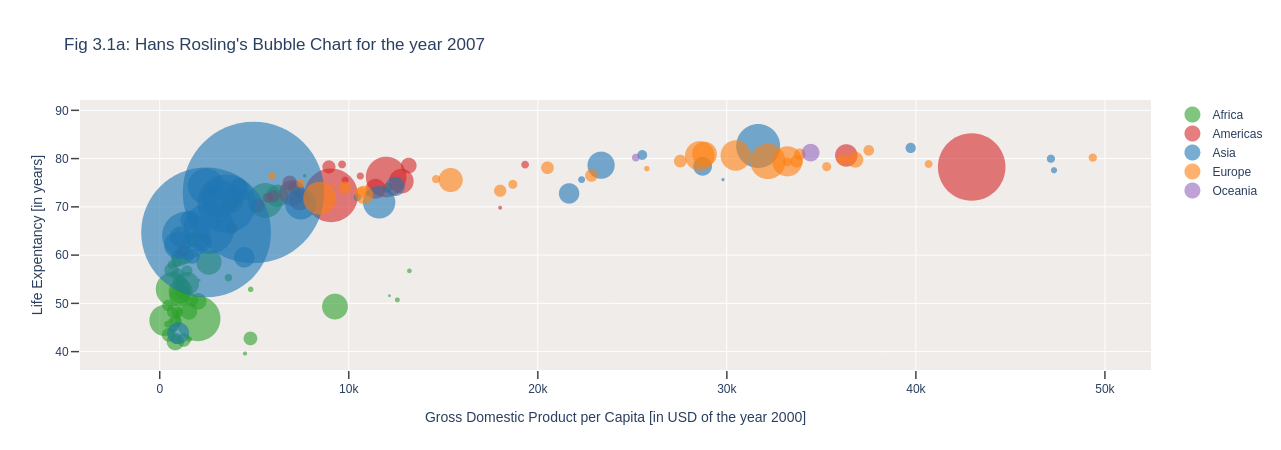

In [17]:
fig = go.Figure(data=data, layout=layout)
plot_url = iplot(fig)

In [18]:
# Update 'xaxis' key, set it to log type and with a power exponent format
fig['layout']['xaxis'].update(
    type='log',
    exponentformat='power',
    showexponent='all'
)

# Update the layout object
fig['layout'].update(
    hovermode='closest',  # (!) hover -> closest data pt
    showlegend=False,     # remove legend (info in hover)
    autosize=False,       # turn off autosize
    width=650,            # plot width
    height=500,           # plot height
)

Layout({
    'autosize': False,
    'height': 500,
    'hovermode': 'closest',
    'plot_bgcolor': '#EFECEA',
    'showlegend': False,
    'template': '...',
    'title': {'text': "Fig 3.1a: Hans Rosling's Bubble Chart for the year 2007"},
    'width': 650,
    'xaxis': {'exponentformat': 'power',
              'gridcolor': '#FFFFFF',
              'showexponent': 'all',
              'ticklen': 8,
              'ticks': 'outside',
              'tickwidth': 1.5,
              'title': {'text': 'Gross Domestic Product per Capita [in USD of the year 2000]'},
              'type': 'log',
              'zeroline': False},
    'yaxis': {'gridcolor': '#FFFFFF',
              'ticklen': 8,
              'ticks': 'outside',
              'tickwidth': 1.5,
              'title': {'text': 'Life Expentancy [in years]'},
              'zeroline': False}
})

In [19]:
# Define a hover-text generating function (returns a list of strings)
def make_text(X):
    return 'Country: %s\
    <br>Life Expectancy: %s years\
    <br>GDP per capita: %s $\
    <br>Population: %s million'\
    % (X['country'], X['lifeExp'], X['gdpPercap'], X['pop']/1e6)     
    
# Again, group data frame by continent sub-dataframe (named X),
#   make one trace object per continent and append to data object
i_trace = 0                                        # init. trace counter

for continent, X in df_year.groupby('continent'):
    text = X.apply(make_text, axis=1).tolist()     # get list of hover texts
    fig['data'][i_trace].update(text=text)         # update trace i
    i_trace += 1                                   # inc. trace counter



In [20]:
# Update layout with an annotation object in 'annotations' (linked to a list)
fig['layout'].update(annotations=Annotations([
    Annotation(
        text='Data source: GapMinder 2007',  # annotation text
        showarrow=False,                     # remove arrow 
        xref='paper',   # use paper coords
        yref='paper',   #  for both x and y coordinates
        x=0.02,         # x-coord (slightly of plotting area edge)
        y=0.98,         # y-coord (slightly of plotting area edge)
        font=Font(size=14),   # increase font size (default is 12)
        bgcolor='#FFFFFF',    # white background
        borderpad=4           # set border/text space (in pixels)
    )
]))  

# Update title
title = "Fig 3.1b: Hans Rosling's Bubble Chart for the year {}".format(the_year)
fig['layout'].update(title=title)


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:329: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:149: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:68: DeprecationWarning:

plotly.graph_objs.Annotations is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




Layout({
    'annotations': [{'bgcolor': '#FFFFFF',
                     'borderpad': 4,
                     'font': {'size': 14},
                     'showarrow': False,
                     'text': 'Data source: GapMinder 2007',
                     'x': 0.02,
                     'xref': 'paper',
                     'y': 0.98,
                     'yref': 'paper'}],
    'autosize': False,
    'height': 500,
    'hovermode': 'closest',
    'plot_bgcolor': '#EFECEA',
    'showlegend': False,
    'template': '...',
    'title': {'text': "Fig 3.1b: Hans Rosling's Bubble Chart for the year 2007"},
    'width': 650,
    'xaxis': {'exponentformat': 'power',
              'gridcolor': '#FFFFFF',
              'showexponent': 'all',
              'ticklen': 8,
              'ticks': 'outside',
              'tickwidth': 1.5,
              'title': {'text': 'Gross Domestic Product per Capita [in USD of the year 2000]'},
              'type': 'log',
              'zeroline': False},
    'ya

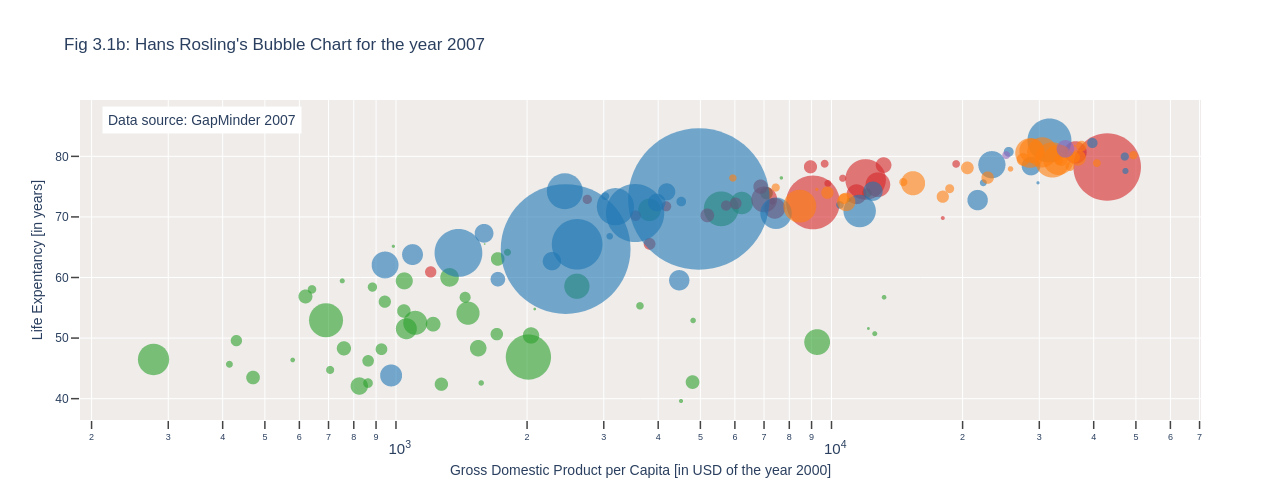

In [21]:
# (@) Send to Plotly and show in notebook
iplot(fig)    

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot
from plotly.graph_objs import *
import plotly.tools as tls  
import plotly.graph_objs as go
init_notebook_mode()

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.offline import plot
from plotly.graph_objs import *
import plotly.tools as tls  
import plotly.graph_objs as go
init_notebook_mode()

In [12]:
import numpy as np  # (*) numpy for math functions and arrays

# (*) Pandas for data manipulation
import pandas as pd 

# Read csv file and define dataframe object (df for dataframe)
df = pd.read_csv('notebooks_test/Testing/Graphic_Libraries/gapminderDataFiveYear.txt', sep='\t')

df.head()  # show dataframe header to stdout


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [13]:
# Choose a year, find other years with df['year'].unique()
the_year = 2007   

# Find indices corresponding to 'the_year'
i_year = (df['year'] == the_year)

# Grab all rows correponding to 'the_year'
df_year = df[i_year] 

In [14]:
colors = dict(
    Asia='#1f77b4', 
    Europe='#ff7f0e', 
    Africa='#2ca02c',
    Americas='#d62728',
    Oceania='#9467bd'
)
# (!) Set 'size' values to be proportional to rendered area,
#     instead of diameter. This makes the range of bubble sizes smaller
sizemode = 'area'       

# (!) Set a reference for 'size' values (i.e. a population-to-pixel scaling).
#     Here the max bubble area will be on the order of 100 pixels
sizeref = df_year['pop'].max() / 1e2**2

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, continent, sizes, color):  
    return Scatter(
        x=X['gdpPercap'],  # GDP on the x-xaxis
        y=X['lifeExp'],    # life Exp on th y-axis
        name=continent,    # label continent names on hover
        mode='markers',    # (!) point markers only on this plot
        marker= Marker(
            color=color,          # marker color
            size=sizes,           # (!) marker sizes (sizes is a list)
            sizeref=sizeref,      # link sizeref
            sizemode=sizemode,    # link sizemode
            opacity=0.6,          # (!) partly transparent markers
            line=Line(width=0.0)  # remove marker borders
        )
    )

In [15]:


# Initialize data object 
data = Data()

# Group data frame by continent sub-dataframe (named X), 
#   make one trace object per continent and append to data object
for continent, X in df_year.groupby('continent'):
    
    sizes = X['pop']                            # get population array 
    color = colors[continent]                   # get bubble color
    
    data.append(
        make_trace(X, continent, sizes, color)  # append trace to data object
    )                             



/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [16]:
# Set plot and axis titles
title = "Fig 3.1a: Hans Rosling's Bubble Chart for the year {}".format(the_year)
x_title = "Gross Domestic Product per Capita [in USD of the year 2000]"
y_title = "Life Expentancy [in years]"

# Define a dictionary of axis style options
axis_style = dict(     
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5         #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    )
)

/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


